# Speech Emotion Recognition – Preprocessing
## Notebook 2: One Hot Encoding (Emotion Labels)

**Registration Number:** ITxxxxxxxx  
**Task:** Encode categorical emotion labels using One Hot Encoding.  
**Objective:** Represent emotion classes as binary vectors without implying any order.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [5]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels sample:", y[:10])

Features shape: (2870, 116)
Labels sample: ['neutral' 'neutral' 'neutral' 'neutral' 'calm' 'calm' 'calm' 'calm'
 'calm' 'calm']


### Step 2: Explore Emotion Labels

Unique Emotions: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


C:\Users\MSI\AppData\Local\Temp\ipykernel_10508\291777396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=unique_emotions, palette="Set2")


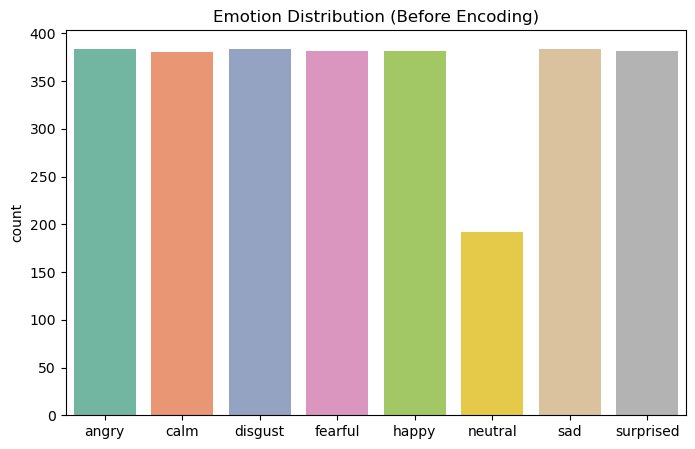

In [6]:
unique_emotions, counts = np.unique(y, return_counts=True)
print("Unique Emotions:", unique_emotions)

plt.figure(figsize=(8,5))
sns.countplot(x=y, order=unique_emotions, palette="Set2")
plt.title("Emotion Distribution (Before Encoding)")
plt.show()

### Step 3: Apply One Hot Encoding
Each class becomes a binary vector.

In [7]:
# Reshape labels to column vector
y = y.reshape(-1,1)

# Apply One Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

print("One Hot Shape:", y_onehot.shape)
print("First 5 Encoded Labels:\n", y_onehot[:5])
print("Classes:", encoder.categories_)

One Hot Shape: (2870, 8)
First 5 Encoded Labels:
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
Classes: [array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)]


### Step 4: Visualize Encoded Distribution

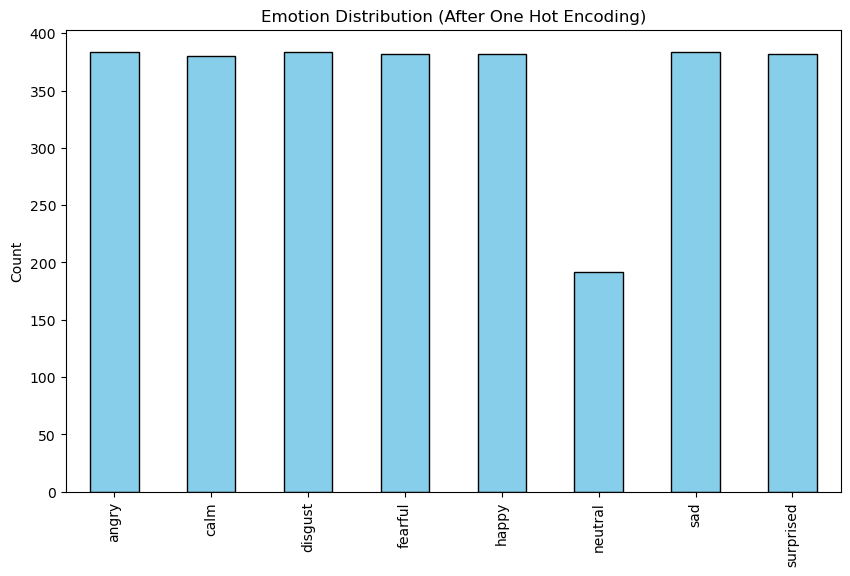

In [8]:
# Convert to DataFrame for easy plotting
df_ohe = pd.DataFrame(y_onehot, columns=encoder.categories_[0])

plt.figure(figsize=(10,6))
df_ohe.sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Emotion Distribution (After One Hot Encoding)")
plt.ylabel("Count")
plt.show()

# ✅ Conclusion
- We applied **One Hot Encoding** to emotion labels.  
- Each label is now represented as a binary vector → no false order between classes.  
- Example: "happy" → [0,0,1,0,0,0,0,0].  
- One Hot Encoding is more appropriate than Label Encoding for categorical emotions.